In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np
import random
from scipy.stats import spearmanr

In [3]:
alpha_screen = pd.read_csv("../../data/salmon_data/alpha_mae_df_7.csv", index_col=0)
mae_df = pd.read_csv("../../data/salmon_data/results_ave_mae_7.csv", index_col=0)
salmon_GO = pd.read_csv("../../data/salmon_data/salmon_GO_annotations.tsv", sep='\t')
salmon_GO

,SYMBOL,ENTREZID,GENENAME,GO,ONTOLOGY,GO.term
0,1433b,100196586.0,14-3-3 protein beta/alpha,NaN,NaN,NaN
1,143b2,100195171.0,14-3-3 protein beta/alpha-2,GO:0004497,MF,"Term = \monooxygenase activity\"""""
2,143g1,100380373.0,14-3-3 protein gamma-1,NaN,NaN,NaN
3,143g2,100194987.0,14-3-3 protein gamma-2,NaN,NaN,NaN
4,2a5e,100195340.0,Serine/threonine-protein phosphatase 2A 56 kDa...,GO:0000159,CC,"Term = \protein phosphatase type 2A complex\"""""
...,...,...,...,...,...,...
96336,zufsp,100380430.0,zinc finger containing ubiquitin peptidase 1,NaN,NaN,NaN
96337,zwilch,106584830.0,zwilch kinetochore protein,NaN,NaN,NaN
96338,zyg11,106613955.0,"zyg-11 family member, cell cycle regulator",NaN,NaN,NaN
96339,zzef1,106567411.0,"zinc finger, ZZ-type with EF hand domain 1",GO:0005509,MF,"Term = \calcium ion binding\"""""


Text(0, 0.5, 'MAE')

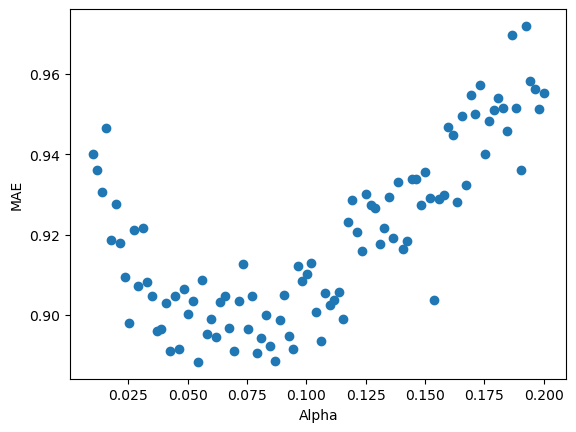

In [4]:
plt.scatter(x=alpha_screen.alphas, y= alpha_screen.mae_list)
plt.xlabel("Alpha")
plt.ylabel("MAE")

In [5]:
error_low = []
error_high = []
min_mae = np.inf
best_alpha = None
best_alpha_stdev = None
for index, row in alpha_screen.iterrows():
    cv =  ast.literal_eval(row["all_maes"])
    error_low.append(np.percentile(cv, 5))
    error_high.append(np.percentile(cv, 95))
    mean_mae = row["mae_list"]
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_alpha = row["alphas"]
        best_alpha_stdev = np.std(cv)


In [6]:
best_alpha

0.0541414141414141

In [7]:
best_alpha_stdev

0.05647512048893856

In [8]:
min_mae

0.8883008613051

In [9]:
best_alpha_plus_std = min_mae + best_alpha_stdev
best_alpha_plus_std

0.9447759817940385

In [10]:
chosen_alpha_df = alpha_screen[alpha_screen["mae_list"] < best_alpha_plus_std]
chosen_alpha_df = chosen_alpha_df[chosen_alpha_df["alphas"] > best_alpha]
chosen_alpha_df.sort_values(by="mae_list", inplace=True)
chosen_alpha = chosen_alpha_df["alphas"].iloc[0]
chosen_alpha

0.0867676767676767

In [11]:
light_green = (0.0, 0.6, 0.5)
pink = (1, 0.078, 0.576)

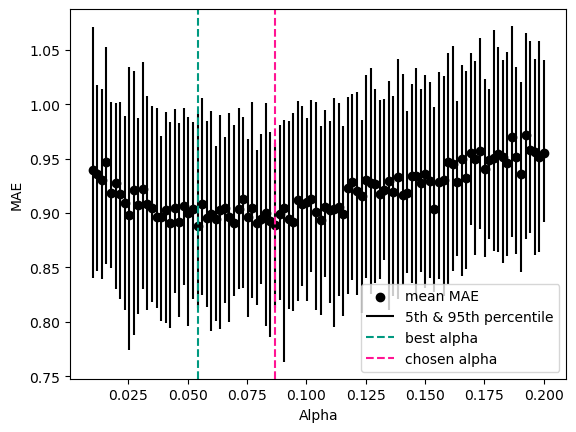

In [12]:
plt.scatter(x=alpha_screen.alphas, 
            y= alpha_screen.mae_list,
            c='k',
            label="mean MAE")
plt.vlines(alpha_screen.alphas, 
           error_low, 
           error_high,
           colors='k',
           label = "5th & 95th percentile")
plt.axvline(x=best_alpha, color=light_green, linestyle='--', label = "best alpha")
plt.axvline(x=chosen_alpha, color=pink, linestyle='--', label = "chosen alpha")
plt.xlabel("Alpha")
plt.ylabel("MAE")
plt.legend(loc="lower right")

In [13]:
# Rename for plotting
mae_df["Gene"] = mae_df["Gene"].astype(str).str.replace('_', ' ')

In [14]:
mae_df.sort_values(by="ave_MAE", inplace=True)
mae_df.reset_index(drop=True, inplace=True)
idx_first_random = mae_df[mae_df["Gene"].str.contains("Random")].index[0]
idx_first_random
# top_random = mae_df.head(1)
# top_random = top_random["Gene"].values[0]
# top_random
#mae_df

392

           Gene   ave_MAE
0  LOC106566372  0.969253
1           hba  0.970889
2  LOC106607380  0.982300
3  LOC106578021  0.982961
4          duox  0.983580


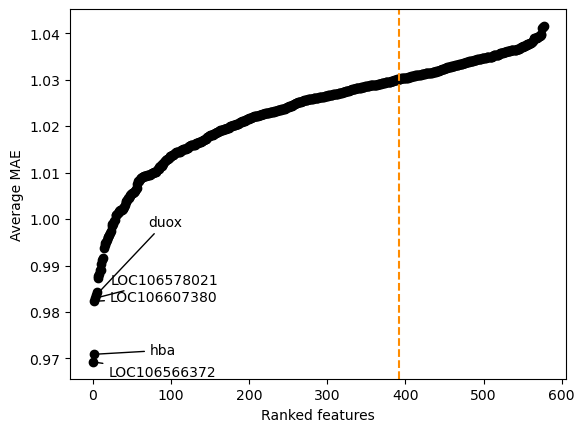

In [15]:
mae_df.sort_values(by="ave_MAE", inplace=True)

print(mae_df.head())

mae_list = list(mae_df["ave_MAE"])
feature_list = list(mae_df["Gene"])
x = np.linspace(0, len(mae_df), len(mae_df))
y = mae_list

plt.scatter(x, y, c='k')
plt.annotate(feature_list[0], (x[0], y[0]), textcoords="offset points", xytext=(50,-10), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
plt.annotate(feature_list[1], (x[1], y[1]), textcoords="offset points", xytext=(50,0), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
plt.annotate(feature_list[2], (x[2], y[2]), textcoords="offset points", xytext=(50,0), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
plt.annotate(feature_list[3], (x[3], y[3]), textcoords="offset points", xytext=(50,10), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
plt.annotate(feature_list[4], (x[4], y[4]), textcoords="offset points", xytext=(50,50), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
plt.axvline(x=idx_first_random, ls="--", c = "darkorange")

plt.ylabel("Average MAE")
plt.xlabel("Ranked features")
plt.show()

In [16]:
mae_df.sort_values(by="Gene")["Gene"].values

array(['LOC100136415', 'LOC100136435', 'LOC100136455', 'LOC100194634',
       'LOC100194720', 'LOC100195288', 'LOC100196094', 'LOC100196494',
       'LOC100196683', 'LOC100196779', 'LOC100286508', 'LOC100380447',
       'LOC100380615', 'LOC100380644', 'LOC100380663', 'LOC100380664',
       'LOC100380774', 'LOC101448011', 'LOC101448032', 'LOC106560239',
       'LOC106560384', 'LOC106560797', 'LOC106561219', 'LOC106561261',
       'LOC106561867', 'LOC106561917', 'LOC106562308', 'LOC106562421',
       'LOC106562734', 'LOC106563358', 'LOC106563474', 'LOC106564502',
       'LOC106564730', 'LOC106565309', 'LOC106565341', 'LOC106565346',
       'LOC106565569', 'LOC106565572', 'LOC106565579', 'LOC106565661',
       'LOC106565709', 'LOC106565855', 'LOC106565894', 'LOC106565952',
       'LOC106565979', 'LOC106566040', 'LOC106566298', 'LOC106566372',
       'LOC106566409', 'LOC106566713', 'LOC106567189', 'LOC106567267',
       'LOC106567292', 'LOC106567406', 'LOC106567698', 'LOC106567894',
      

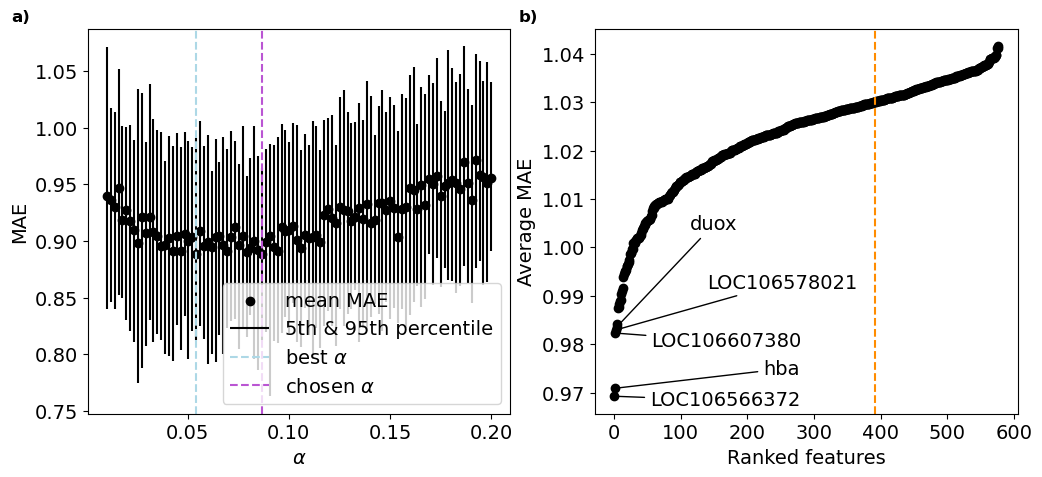

In [36]:
plt.rcParams.update({'font.size': 14})
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

ax1.scatter(x=alpha_screen.alphas, 
            y= alpha_screen.mae_list,
            c='k',
            label="mean MAE")
ax1.vlines(alpha_screen.alphas, 
           error_low, 
           error_high,
           colors='k',
           label = "5th & 95th percentile")
ax1.axvline(x=best_alpha, color="lightblue", linestyle='--', label = r"best $\alpha$")
ax1.axvline(x=chosen_alpha, color="mediumorchid", linestyle='--', label = r"chosen $\alpha$")
ax1.set_xlabel(r'$\alpha$')
ax1.set_ylabel("MAE")
ax1.legend(loc="lower right")

ax2.scatter(x, y, c='k')
ax2.annotate(feature_list[0], (x[0], y[0]), textcoords="offset points", xytext=(80,-7), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
ax2.annotate(feature_list[1], (x[1], y[1]), textcoords="offset points", xytext=(120,10), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
ax2.annotate(feature_list[2], (x[2], y[2]), textcoords="offset points", xytext=(80,-10), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
ax2.annotate(feature_list[3], (x[3], y[3]), textcoords="offset points", xytext=(120,30), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
ax2.annotate(feature_list[4], (x[4], y[4]), textcoords="offset points", xytext=(70,70), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
ax2.axvline(x=idx_first_random, ls="--", c = "darkorange")

ax2.set_ylabel("Average MAE")
ax2.set_xlabel("Ranked features")

ax1.text(-0.18, 1.05, 'a)', transform=ax1.transAxes, fontsize=12, fontweight='bold', va='top')
ax2.text(-0.18, 1.05, 'b)', transform=ax2.transAxes, fontsize=12, fontweight='bold', va='top')
plt.savefig("../../figures/LGR_salmon_size.pdf")
plt.savefig("../../figures/LGR_salmon_size.png")

In [18]:
# Top genes
top20genes = list(mae_df.head(20)["Gene"])
top20genes

['LOC106566372',
 'hba',
 'LOC106607380',
 'LOC106578021',
 'duox',
 'pgfrl',
 'LOC106602771',
 'LOC106583594',
 'LOC106601072',
 'LOC106561261',
 'otub1',
 'LOC123724067',
 'LOC106596975',
 'LOC106601071',
 'LOC106588007',
 'LOC106613694',
 'LOC123723984',
 'LOC106594147',
 'LOC106602341',
 'LOC106607236']

In [19]:
['LOC106566372',
 'hba',
 'LOC106607380',
 'duox',
 'LOC106583594',
 'LOC106601072',
 'pgfrl',
 'LOC106601071',
 'LOC106578021',
 'LOC123724067']

['LOC106566372',
 'hba',
 'LOC106607380',
 'duox',
 'LOC106583594',
 'LOC106601072',
 'pgfrl',
 'LOC106601071',
 'LOC106578021',
 'LOC123724067']

In [20]:
contains_hemoglobin = salmon_GO.dropna()
contains_hemoglobin = contains_hemoglobin[contains_hemoglobin["GENENAME"].str.contains("hemoglobin")]
contains_hemoglobin.shape

(100, 6)

In [21]:
# Calc for the probability of encountering hemoglobin genes 5 times
all_gene_names = list(salmon_GO["GENENAME"].unique())
len(all_gene_names)

32357

In [22]:
hemoglobin_count_list = []
for iteration in range(10000):
    random20 = random.sample(all_gene_names, 20)
    hemoglobin_count = 0
    for gene in random20:
        if "hemoglobin" in str(gene):
            hemoglobin_count += 1
    hemoglobin_count_list.append(hemoglobin_count)

In [23]:
max(hemoglobin_count_list)

1

Text(0.5, 0, 'Number of hemoglobin genes')

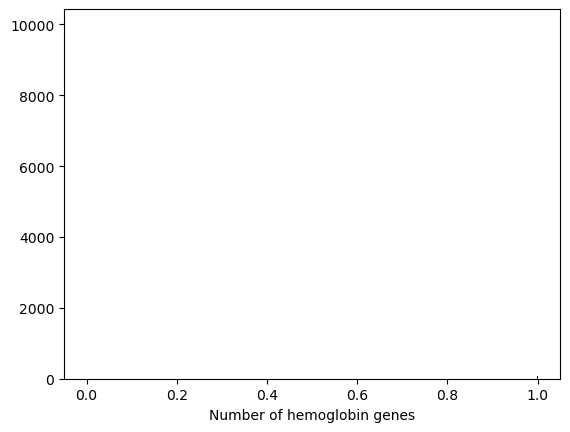

In [24]:
plt.hist(hemoglobin_count_list, bins=1000, color='k')
plt.xlabel("Number of hemoglobin genes")

In [25]:
random20

['torsin-1A-interacting protein 2-like',
 'solute carrier family 25-2',
 'prune homolog 2 with BCH domain',
 'serotonin N-acetyltransferase-like',
 'protein WWC2',
 'nuclear distribution gene C homolog',
 'zinc finger protein 148',
 'conserved oligomeric Golgi complex subunit 7-like',
 'MORN repeat-containing protein 1',
 'zinc finger SWIM domain-containing protein 5',
 'astrotactin-2',
 'uncharacterized LOC123742387',
 'uncharacterized LOC106602857',
 'interferon regulatory factor 2-binding protein 1',
 'BEN domain-containing protein 4',
 'RAD50 interactor 1',
 'uncharacterized LOC106574635',
 'KH domain containing 4, pre-mRNA splicing factor',
 'G-protein coupled receptor 143-like',
 'myosin-6']

In [26]:
transcriptome_XY = pd.read_csv("../../data/transcriptome_XY.csv", index_col=0)
transcriptome_XY

FileNotFoundError: [Errno 2] No such file or directory: '../../data/transcriptome_XY.csv'

In [ ]:
hemoglobin_genes = ["hba", "LOC106607380", "LOC106601072", "LOC106601071", "LOC123724067"]
hemoglobin_genes_df = transcriptome_XY[hemoglobin_genes]
hemoglobin_genes_df

,hba,LOC106607380,LOC106601072,LOC106601071,LOC123724067
F001,7.841489,6.684127,9.049141,6.934034,7.471161
F002,8.049102,7.776955,8.876601,7.313821,7.894540
F003,9.321372,9.142760,10.515895,8.078872,9.749636
F004,9.442323,7.953808,10.629716,9.164211,7.985053
F005,9.187983,8.223300,10.425331,8.316614,7.714572
...,...,...,...,...,...
F450,9.183097,8.909547,10.836300,8.788188,9.540840
F456,10.432081,9.924495,11.906412,9.321568,9.459813
F458,8.419208,8.547975,9.500379,6.595032,6.923386
F459,6.873686,5.033837,6.992821,7.403194,5.033837


In [ ]:
hemoglobin_genes_df.corr()

,hba,LOC106607380,LOC106601072,LOC106601071,LOC123724067
hba,1.000000,0.900110,0.946565,0.907537,0.764438
LOC106607380,0.900110,1.000000,0.901939,0.787359,0.839774
LOC106601072,0.946565,0.901939,1.000000,0.914895,0.765783
LOC106601071,0.907537,0.787359,0.914895,1.000000,0.600831
LOC123724067,0.764438,0.839774,0.765783,0.600831,1.000000


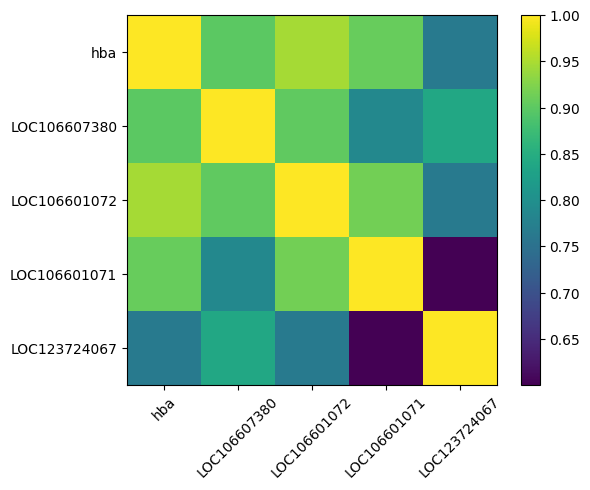

In [ ]:
plt.imshow(hemoglobin_genes_df.corr())
plt.xticks(np.arange(len(hemoglobin_genes)), hemoglobin_genes, rotation=45)
plt.yticks(np.arange(len(hemoglobin_genes)), hemoglobin_genes)
plt.colorbar()

In [ ]:
for hgene_a in hemoglobin_genes:
    for hgene_b in hemoglobin_genes:
        if hgene_a != hgene_b:
            rho, p_value = spearmanr(x, y)
            print(hgene_a, hgene_b, p_value)

hba LOC106607380 0.0
hba LOC106601072 0.0
hba LOC106601071 0.0
hba LOC123724067 0.0
LOC106607380 hba 0.0
LOC106607380 LOC106601072 0.0
LOC106607380 LOC106601071 0.0
LOC106607380 LOC123724067 0.0
LOC106601072 hba 0.0
LOC106601072 LOC106607380 0.0
LOC106601072 LOC106601071 0.0
LOC106601072 LOC123724067 0.0
LOC106601071 hba 0.0
LOC106601071 LOC106607380 0.0
LOC106601071 LOC106601072 0.0
LOC106601071 LOC123724067 0.0
LOC123724067 hba 0.0
LOC123724067 LOC106607380 0.0
LOC123724067 LOC106601072 0.0
LOC123724067 LOC106601071 0.0
